In [189]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv('dj38.tsp', sep=' ', header=None, skiprows=10) # 跳过前10行
df[0] -= 1
df.head()

,0,1,2
0,0,11003.6111,42102.5000
1,1,11108.6111,42373.8889
2,2,11133.3333,42885.8333
3,3,11155.8333,42712.5000
4,4,11183.3333,42933.3333


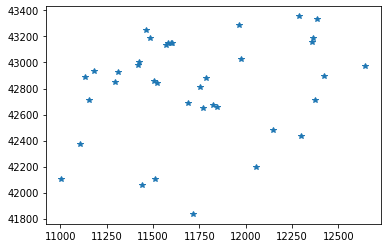

In [191]:
plt.plot(df[1], df[2], '*')

In [203]:
n_cities = len(df)  # 城市数量
n_species = 500  # 种群大小

In [204]:
# 计算各个城市的邻接矩阵
dist = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(n_cities):
        dist[i, j] = np.sqrt(
            (df.iloc[i, 1] - df.iloc[j, 1]) ** 2 + \
                (df.iloc[i, 2] - df.iloc[j, 2]) ** 2)

In [205]:
# 初始化种群，生成初始解的集合
x = []
for _ in range(n_species):
    gene = np.random.permutation(n_cities)
    gene = gene.tolist()
    gene.append(gene[0])
    x.append(gene)

len(x)

500

In [206]:
def total_dist(gene):
    total_dist = 0
    n = len(gene)
    for i in range(n-1):
        cur_city = gene[i]
        next_city = gene[i+1]
        total_dist += dist[cur_city, next_city]
    return total_dist

In [207]:
total_dist([29,28,20,13,9,0,1,3,2,4,5,6,7,8,11,10,18,17,16,15,12,14,19,22,25,24,21,23,27,26,30,35,33,32,37,36,34,31,29])

6659.431532931466

In [208]:
def cal_fitness(gene):
    return 1 / total_dist(gene)

In [209]:
def crossover(f, m):
    f, m = f[:-1], m[:-1]
    n = len(f)
    # 选择交叉点交换片段
    p1, p2 = np.random.choice(n, 2, replace=False)
    if p1 > p2:
        p1, p2 = p2, p1
    p1, p2 = 1, 5
    temp = f[p1:p2]
    f[p1:p2] = m[p1:p2]
    m[p1:p2] = temp
    # 建立映射
    map_f = {f[i] : m[i] for i in range(p1, p2)}
    map_m = {m[i] : f[i] for i in range(p1, p2)}
    # 去重
    for i in range(0, p1):
        while f[i] in map_f:
            f[i] = map_f[f[i]]
        while m[i] in map_m:
            m[i] = map_m[m[i]]
    for i in range(p2, n):
        while f[i] in map_f:
            f[i] = map_f[f[i]]
        while m[i] in map_m:
            m[i] = map_m[m[i]]
    f.append(f[0])
    m.append(m[0])
    return f, m

In [210]:
def mutate(gene):
    n = len(gene)
    i, j = np.random.choice(n,2,replace=False)
    if i > j:
        i, j = j, i
    after_mutate = gene[0:i]
    temp = list(reversed(gene[i:j]))
    after_mutate.extend(temp)
    after_mutate.extend(gene[j:n])
    return after_mutate

In [211]:
def selection(x, rate=0.2):
    x_new = x[:]
    n = len(x)
    # 选取最优的若干个
    x_new.sort(key=lambda x: total_dist(x))
    parents = x_new[:int(n * rate)]
    # 个体在整个种群适应度分布
    fit_list = [cal_fitness(x_new[i]) for i in range(n)]
    prob = fit_list / sum(fit_list)
    # 剩余按照适应度随机选取配偶
    idx = np.random.choice(n, size=int((1 - rate) * n), replace=False, p=prob)
    parents.extend([x_new[i] for i in idx])
    return parents

In [212]:

for it in range(2000):
    x_new = selection(x)
    k = n_species // 2
    for i in range(k):
        j = i + k
        f, m = crossover(x_new[i], x_new[j])
        if np.random.rand() < 0.1:
            f = mutate(f)
            m = mutate(m)
        x_new[i] = f
        x_new[j] = m
    x = x_new
    if it % 200 == 0:
        x_min = min(map(lambda x: total_dist(x), x_new))
        print(x_min)

21556.703410095037
8373.845879858603
6872.602109913099
6659.906740386758
6659.906740386758
6659.906740386758
6659.906740386758
6659.431532931465
6659.431532931465
6659.431532931465


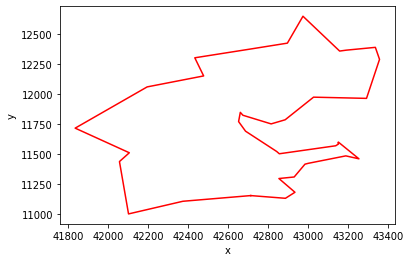

In [213]:
plk1 = []
plk2 = []
for i in range(len(x[0])):
    plk2.append(df.iloc[x[0][i], 1])
    plk1.append(df.iloc[x[0][i], 2])
plot = plt.plot(plk1, plk2, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()